In [1]:
import os
import glob
import shutil
from pathlib import Path
from kalpana.downscaling import runStatic
from IPython.display import display, Image

This is an example for doing the static downscaling using an existing grass location, and importing
the DEM with the mesh elements size. Both inputs were created in the ```01_create_mesh_resolution_raster.ipynb```.

As all the outputs of the ```01_create_mesh_resolution_raster.ipynb``` may have been deleted, we can call 
that function again. This block is identical to the code from the previous example, so skip it if you kept
its outputs. It is important to note that this step depends on the mesh and not on the storm.

In [2]:
from kalpana.downscaling import meshRepLen2raster

cwd = Path(os.getcwd())
fort14 = str(cwd.parent.parent/'adds'/'inputs_examples'/'fort.14') ## path of the fort.14 file
epsgIn = 4326 ## CRS for lat/lon
epsgOut = 6346 ## CRS of downscaling DEM
pathOut = os.path.join(cwd, 'NC_CoNED_subset_100m_mesh.shp') ## full path of the output shapefile 
grassVer = 8.3 ## version of grass 8.2 and 8.3 works
pathRasFiles = str(cwd.parent.parent/'adds'/'inputs_examples')
rasterFiles = 'NC_CoNED_subset_100m.tif'
## in this case we will use the same downscaling raster bounding box as the subdomain. 
subDomain = os.path.join(pathRasFiles, rasterFiles)
nameGrassLocation=None
createGrassLocation=True
createLocMethod='from_raster'

meshRepLen2raster(fort14, epsgIn, epsgOut, pathOut, grassVer, pathRasFiles, rasterFiles, 
                  subDomain=subDomain, nameGrassLocation=nameGrassLocation, 
                  createGrassLocation=createGrassLocation, 
                  createLocMethod=createLocMethod)

2024-07-07 14:51:00.057 | INFO     | kalpana.downscaling:meshRepLen2raster:891 - Mesh created: 0.002 min
2024-07-07 14:51:00.095 | INFO     | kalpana.downscaling:meshRepLen2raster:898 - Clip mesh using subfomain: 0.001 min
2024-07-07 14:51:00.241 | INFO     | kalpana.downscaling:meshRepLen2raster:906 - Export mesh gdf as shapefile: 0.002 min
2024-07-07 14:51:00.272 | INFO     | kalpana.downscaling:meshRepLen2raster:920 -     Start Setup grass environment
2024-07-07 14:51:00.272 | INFO     | kalpana.downscaling:setGrassEnv:337 -         rasters to list:  0.000 min
2024-07-07 14:51:00.394 | INFO     | kalpana.downscaling:setGrassEnv:341 -         create location:  0.002 min
2024-07-07 14:51:00.396 | INFO     | kalpana.downscaling:setGrassEnv:347 -         init grass:  0.000 min
2024-07-07 14:51:00.681 | INFO     | kalpana.downscaling:setGrassEnv:352 -         import raster:  0.005 min
2024-07-07 14:51:00.745 | INFO     | kalpana.downscaling:setGrassEnv:356 -         set downscaling dem: 

Using the outputs from ```01_create_mesh_resolution_raster.ipynb``` and a maxele file, this block
creates water level contours within the area specified by the DEM. There is a short description of 
all inputs below, more detail can be found in the function's docstring.

In [3]:
## full path of the maxele file
cwd = Path(os.getcwd())
ncFile = str(cwd.parent.parent/'adds'/'inputs_examples'/'maxele.63.nc') 
## contour levels to use in the downscaling
## from 0 to 11 (included) every 1
levels = [0, 6, 0.5]
## output CRS
epsgOut = 6346
## full path for the shape file with the maxele contours
## same path is used for saving rasters and the grass location.
## Path can't be relative
pathOut = os.path.join(os.getcwd(), 'maxele_Irene.shp')
## version of grass 8.2 and 8.3 works
grassVer = 8.3
## path of the downscaling rasters
pathRasFiles = str(cwd.parent.parent/'adds'/'inputs_examples')
## rasters filenames, can be a list if more than one. 
## 'all' for importing ALL THE FILES in pathRasFiles 
rasterFiles = 'NC_CoNED_subset_100m.tif'
## full path of the raster with the mesh element size
meshFile = r'NC_CoNED_subset_100m_mesh.tif'
## crs of adcirc output (default value)
epsgIn = 4326
## vertical unit of the maxele
vUnitIn = 'm'
## vertical unit of the downscaled water levels
vUnitOut = 'm'
## name of the maxele variable to downscale. Always 'zeta_max' for downscaling
var = 'zeta_max'
## contours type. Always 'polygon' for downscaling
conType = 'polygon'
## full path of file (kml, kmz, shp, gpkg or tif) to crop the domain.
## in this case we will use the same downscaling raster bounding box as the subdomain
subDomain = os.path.join(pathRasFiles, rasterFiles)
## epsg code or crs of the subDomain. In this case, as we are using the downscaling dem bounding box
## as the subdomain, the same epsg code must be specified.
epsgSubDom = 6346
## boolean for exporting the mesh as a shape file from maxele, not necessary in this
## case since mesh was exported as preprocess. In example_03 it is exported.
exportMesh = False
## full path of pickle file with vertical datum differences for all mesh nodes
## proprocess step
dzFile = r'../../adds/dzDatumsNOAA/dzDaums_noaaTideGauges_msl_navd88.csv'
## threshold to do apply the vertical datum difference
zeroDif = -20
##threshold to define the percentage of the dz given by the spatial interpolation to be applied.
maxDif = -5
## only tide stations closed than this  threshold are used to interpolate the vertical datum difference
distThreshold = 0.5
## number of points to query for the inverse distance-weighted interpolation
k = 7
## full path of the grass location if a existing location will be used
## if None a new location called 'grassLoc' is created. A new location is created in
## example_03. Path can't be relative.
nameGrassLocation = os.path.join(os.getcwd(), 'grassLoc')
## Boolean for creating grass location, in this example it was created as a preprocess
## step. In example_03 it is created.
createGrassLocation = False
## Method for assigning the crs to the grass location. Default and faster option
createLocMethod = 'from_raster'
## variable to downscale, can be 'zMax', 'zMean' and 'zMin'. With 'zMean', the mean value
## of each contour is used.
attrCol = 'zMean'
## how many times the representative length the results are grown in the downscaling
repLenGrowing = 1.0 
## remove wet cells with water level below the ground surface
compAdcirc2dem = True
## transform the water level to water depth
floodDepth = False
## export downscaled results as shape files. Slows down the process a couple of minutes
ras2vec = False
## boolean for exporing raw maxele as a DEM. Useful for debugging
exportOrg = False
## full path of the shapefile with levees
leveesFile = None
## boolean for reprojecting the downscaled dem back to lat/lon
finalOutToLatLon = False

In [4]:
#################### calling downscaling
runStatic(ncFile, levels, epsgOut, pathOut, grassVer, pathRasFiles, rasterFiles, meshFile, epsgIn=epsgIn, 
            vUnitIn=vUnitIn, vUnitOut=vUnitOut, var=var, conType =conType, subDomain=subDomain, epsgSubDom=epsgSubDom, 
            exportMesh= exportMesh, dzFile=dzFile, zeroDif=zeroDif, maxDif=maxDif, distThreshold=distThreshold, k=k, 
            nameGrassLocation=nameGrassLocation, createGrassLocation=createGrassLocation, createLocMethod=createLocMethod, 
            attrCol=attrCol, repLenGrowing=repLenGrowing, compAdcirc2dem=compAdcirc2dem, floodDepth=floodDepth, 
            ras2vec=ras2vec, exportOrg=exportOrg, leveesFile = leveesFile, finalOutToLatLon=finalOutToLatLon)

2024-07-07 14:52:19.857 | INFO     | kalpana.export:nc2shp:817 - Start exporting adcirc to shape
2024-07-07 14:52:19.888 | INFO     | kalpana.export:filledContours2gpd:311 - Begin computing contours using Dask
2024-07-07 14:52:19.896 | INFO     | kalpana.export:filledContours2gpd:313 - Finnished computing contours using Dask
2024-07-07 14:52:19.900 | INFO     | kalpana.export:nc2shp:847 -     Ready with the contours extraction: 0.001 min
2024-07-07 14:52:19.936 | INFO     | kalpana.export:nc2shp:855 -     Cliping contours based on mask: 0.001 min
2024-07-07 14:52:19.946 | INFO     | kalpana.export:nc2shp:873 -     Changing CRS: 0.000 min
2024-07-07 14:52:19.970 | INFO     | kalpana.export:nc2shp:884 -     Saving file: 0.000 min
2024-07-07 14:52:19.970 | INFO     | kalpana.export:nc2shp:901 - Ready with exporting code after: 0.002 min
2024-07-07 14:52:19.971 | INFO     | kalpana.downscaling:runStatic:801 - Static downscaling started
2024-07-07 14:52:20.005 | INFO     | kalpana.downscali

The output raster file can be displayed in any GIS software such as GRASS GIS or QGIS, or with Python packages such as rioxarray. The image below shows the output displayed using QGIS.

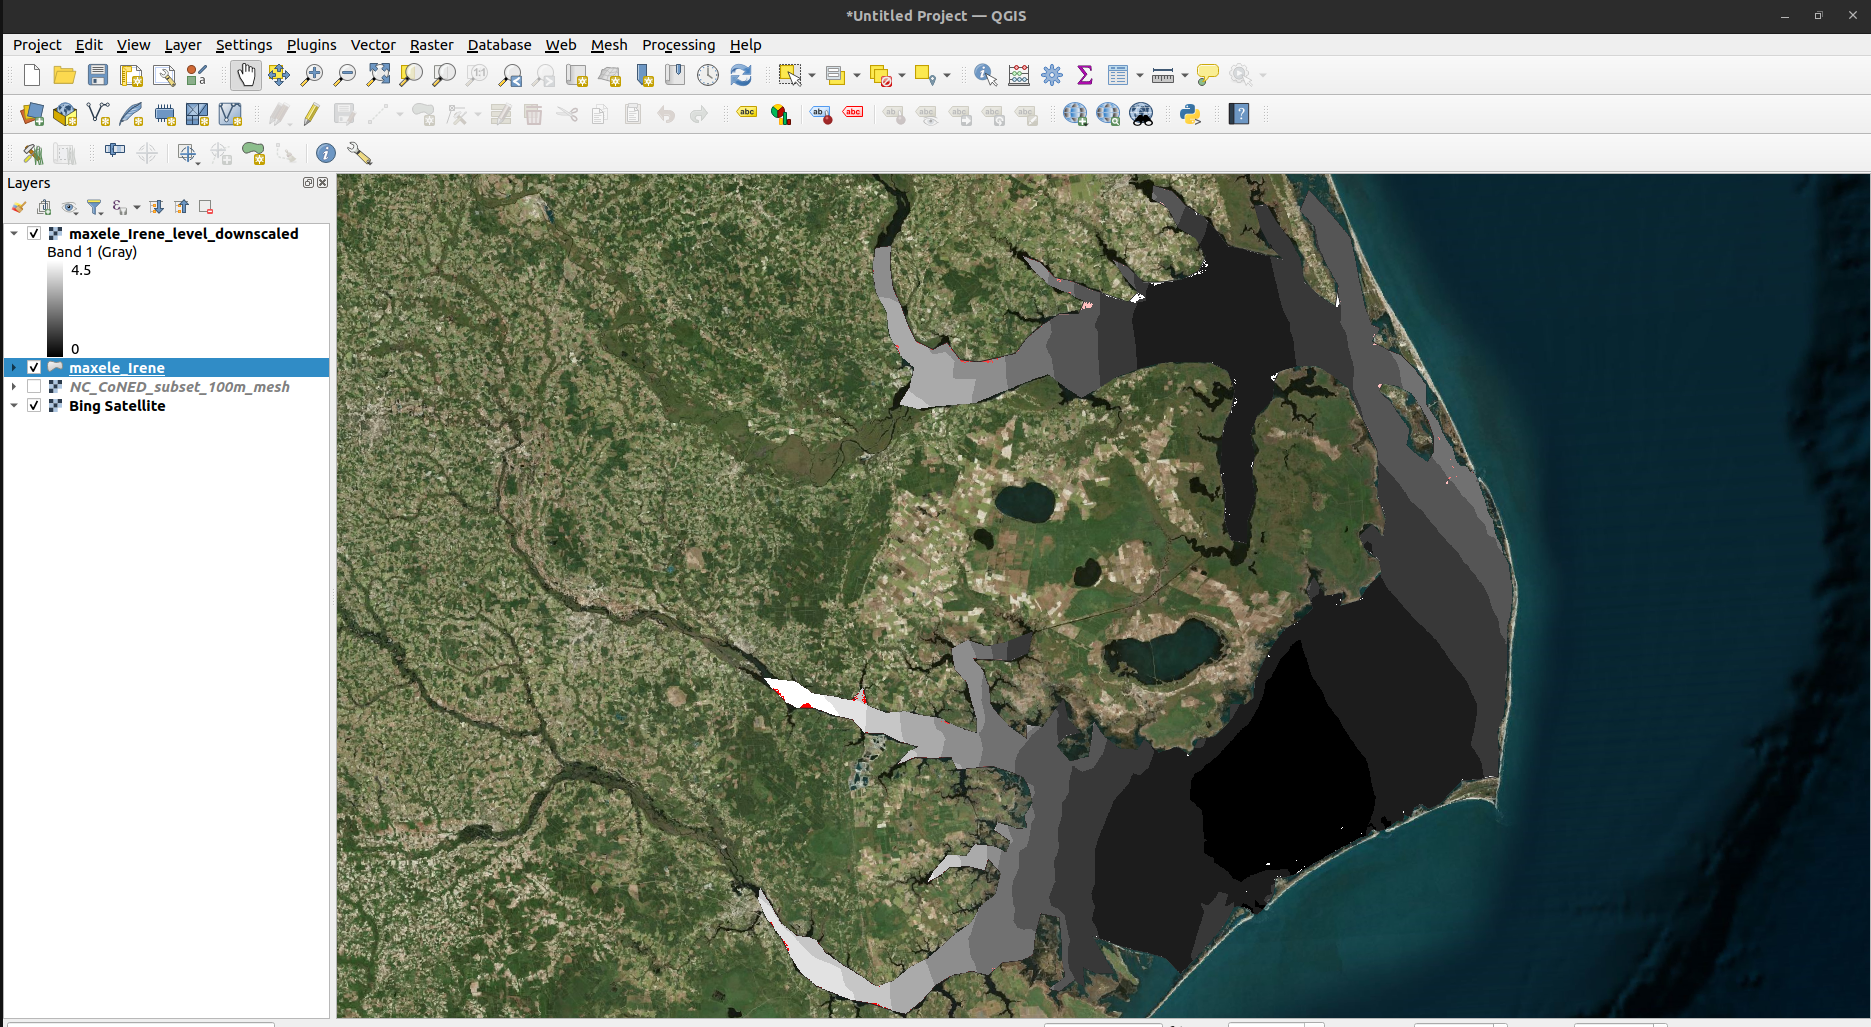

In [9]:
display(Image(filename=r'../../adds/imgs/example_02_downscaling.png', width = 712))

There is no horizontal expansion of the water level in this example becuase the mesh has no elements in the floodplains. However, there are some areas where the flooding is removed becuase the DEM elevation is higher than the water level.

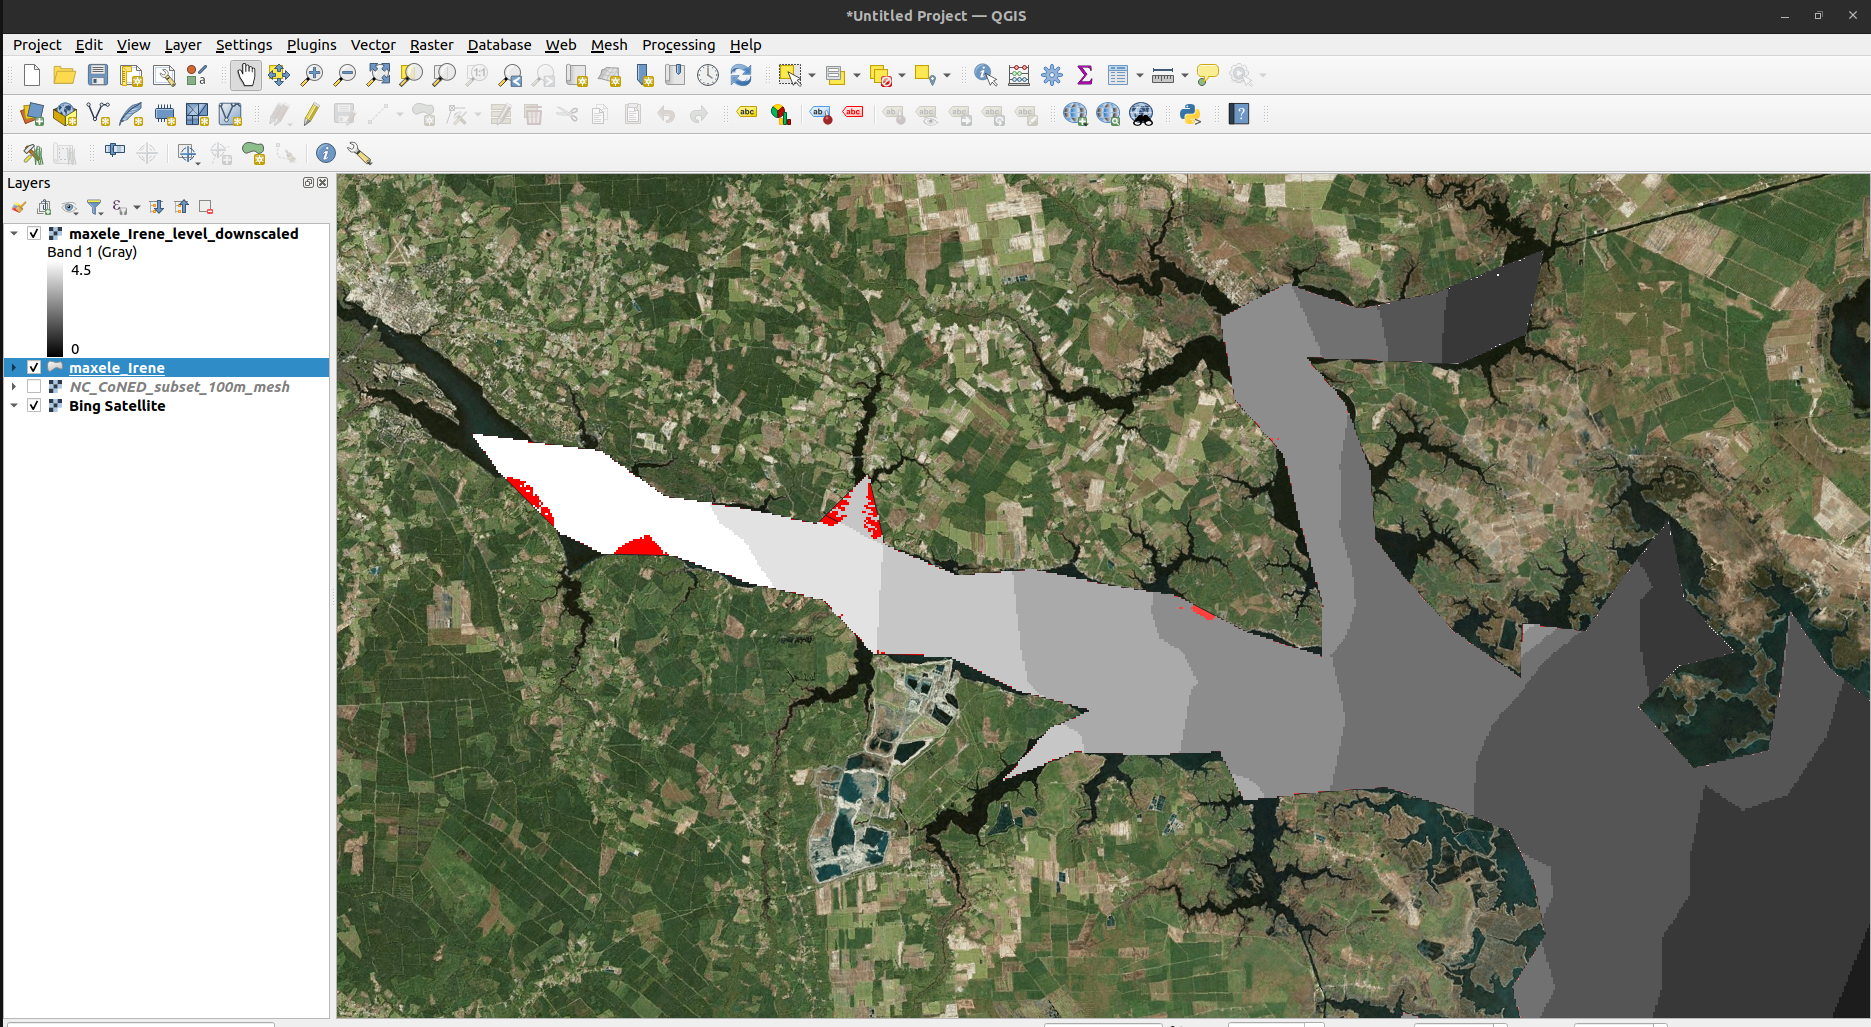

In [10]:
display(Image(filename=r'../../adds/imgs/example_02b_downscaling.png', width = 712))

Again, the following block is here to keep the GitHub repository clean. If this example is being used 
simply as a learning excersize, it's important to keep the environment organized by removing the new 
outputs. Otherwise, the repository would become overcroweded with unessessary files. Do not run this 
block if you need your new files.

In [5]:
## clean
for f in glob.glob("NC_CoNED_subset_100m*"):
    os.remove(f)

for f in glob.glob("downscaling_dem*"):
    os.remove(f)

for f in glob.glob("maxele_Irene*"):
    os.remove(f)

shutil.rmtree('grassLoc')